Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
plt.style.use('fast')

In [16]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
tdf = pd.read_csv(url)
tdf.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [17]:
tdf

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton
...,...,...,...,...,...,...
707,0,3,female,39.0,29.1250,Queenstown
708,0,2,male,27.0,13.0000,Southampton
709,1,1,female,19.0,30.0000,Southampton
710,1,1,male,26.0,30.0000,Cherbourg


In [18]:
tdf['cabin_class'] = tdf['Pclass'].map({1:'first', 2:'second', 3:'third'})
tdf[['Pclass', 'cabin_class']].sample(4)

,Pclass,cabin_class
183,2,second
60,3,third
297,1,first
228,3,third


In [19]:
# Fare
tdf['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

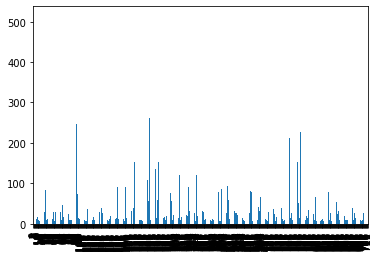

In [22]:
tdf['Fare'].plot(kind='bar');

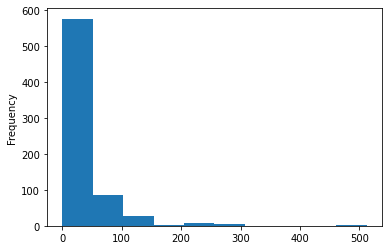

In [23]:
tdf['Fare'].plot(kind='hist');

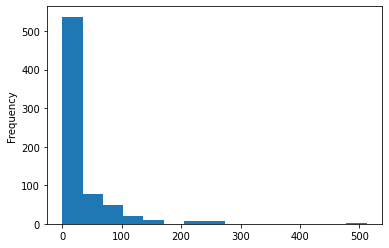

In [26]:
tdf['Fare'].plot(kind='hist', bins=15);

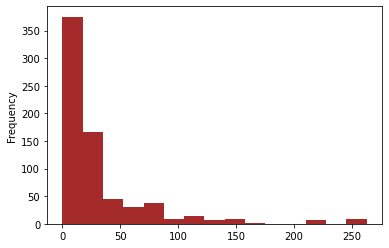

In [32]:
# Remove two extreme outliers
tdf = tdf[tdf['Fare']<500]
tdf['Fare'].plot(kind='hist', bins=15, color='brown');

In [33]:
# a continuous variable can be converted to a categorical var using binning.
tdf['Fare'].describe()


count    709.000000
mean      32.545692
std       42.931277
min        0.000000
25%        8.050000
50%       15.500000
75%       32.320800
max      263.000000
Name: Fare, dtype: float64

In [0]:
#apply those cuts points
farebins = [0, 8, 15, 33, 100000]
farelabels = ['low', 'medium', 'high', 'vhigh']

In [39]:
tdf['fare_groups'] = pd.cut(tdf['Fare'], bins=farebins)
tdf['fare_groups'].value_counts()


(8, 15]         189
(15, 33]        185
(33, 100000]    174
(0, 8]          154
Name: fare_groups, dtype: int64

In [41]:
tdf['fare_groups'] = pd.cut(tdf['Fare'], bins=farebins, labels=farelabels)
tdf['fare_groups'].value_counts().sort_index()

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

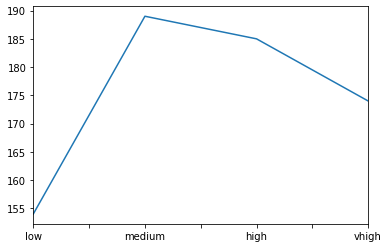

In [42]:
# plot
myresults = tdf['fare_groups'].value_counts().sort_index()
myresults.plot()

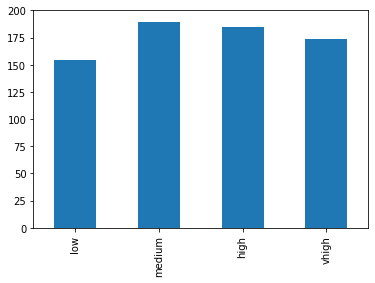

In [43]:
myresults.plot(ylim = (0, 200), kind='bar');

In [44]:
# single continuous variable
tdf['Age'].describe()

count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

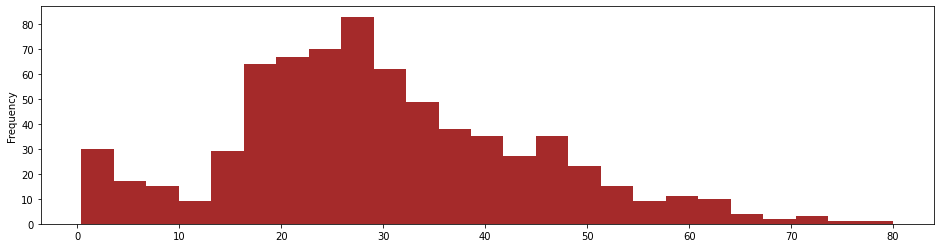

In [45]:
tdf['Age'].plot(kind='hist', bins=25, color='brown', figsize=(16,4));

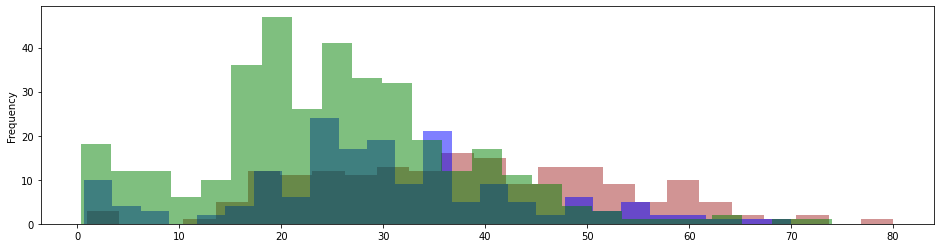

In [53]:
tdf[tdf['cabin_class']=='first']['Age'].plot(kind='hist', bins=25, color='brown', figsize=(16,4), alpha=0.5);
tdf[tdf['cabin_class']=='second']['Age'].plot(kind='hist', bins=25, color='blue', figsize=(16,4), alpha=0.5);
tdf[tdf['cabin_class']=='third']['Age'].plot(kind='hist', bins=25, color='green', figsize=(16,4), alpha=0.5);


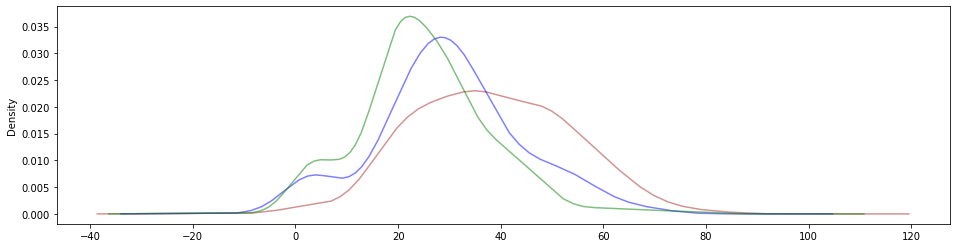

In [54]:
tdf[tdf['cabin_class']=='first']['Age'].plot(kind='density', color='brown', figsize=(16,4), alpha=0.5);
tdf[tdf['cabin_class']=='second']['Age'].plot(kind='density', color='blue', figsize=(16,4), alpha=0.5);
tdf[tdf['cabin_class']=='third']['Age'].plot(kind='density', color='green', figsize=(16,4), alpha=0.5);


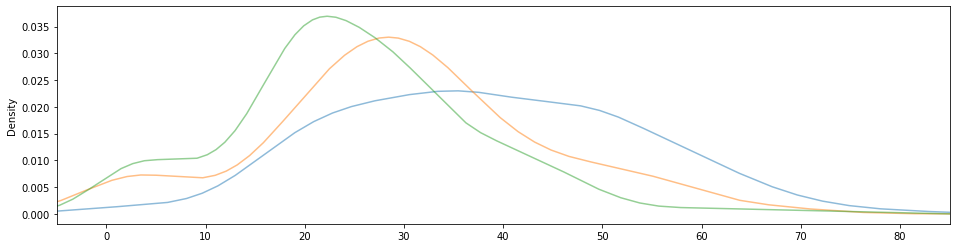

In [57]:
for cabin_type in ['first', 'second', 'third']:
  tdf[tdf['cabin_class']==cabin_type]['Age'].plot(kind='density', figsize=(16,4), alpha=0.5, xlim=(-5, 85));

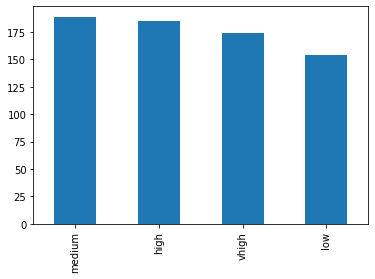

In [58]:
# bar chart
tdf['fare_groups'].value_counts().plot(kind='bar')

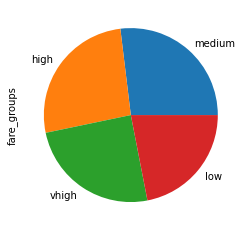

In [59]:
# pie chart
tdf['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

In [60]:
# crosstab
pd.crosstab(tdf['cabin_class'], tdf['Survived'])

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


In [0]:
cab_death = pd.crosstab(tdf['cabin_class'], tdf['Survived'])

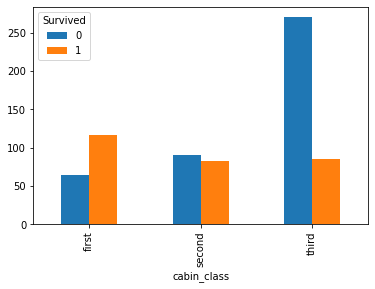

In [62]:
cab_death.plot(kind='bar');

In [65]:
# crosstab with column percent
# normalize=percent
cab_death1 = pd.crosstab(tdf['cabin_class'], tdf['Survived'], normalize='index')
cab_death1

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


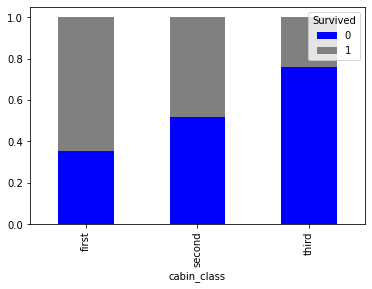

In [66]:
cab_death1.plot(kind='bar', stacked=True, color=['blue', 'gray'])

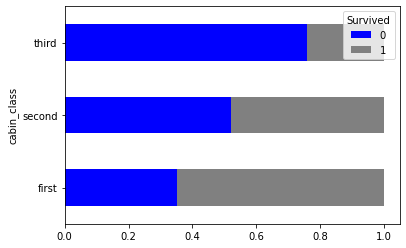

In [67]:
#crosstab 
#barh = horizontal bar
cab_death1.plot(kind='barh', stacked=True, color=['blue', 'gray'])

In [68]:
# categorical and continuous variable
#single continuous variable
tdf['Age'].mean()

29.618011283497882

In [69]:
tdf.groupby('cabin_class').mean()

,Survived,Pclass,Age,Fare
cabin_class,,,,
first,0.646409,1.0,38.151492,81.015838
second,0.479769,2.0,29.877630,21.471556
third,0.239437,3.0,25.140620,13.229435


In [70]:
tdf.groupby('cabin_class')['Age'].mean()

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

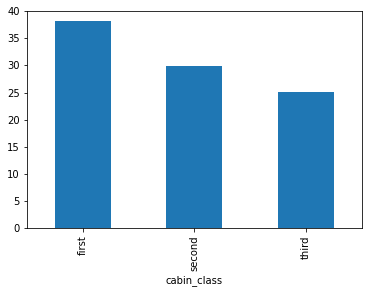

In [71]:
tdf.groupby('cabin_class')['Age'].mean().plot(kind='bar')

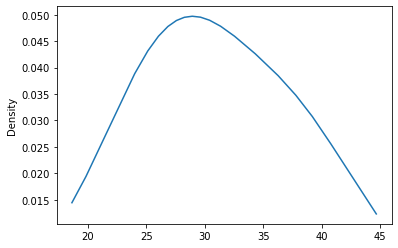

In [74]:
tdf.groupby('cabin_class')['Age'].mean().plot(kind='density')

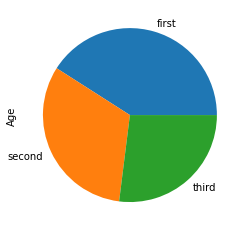

In [73]:
tdf.groupby('cabin_class')['Age'].mean().plot(kind='pie')

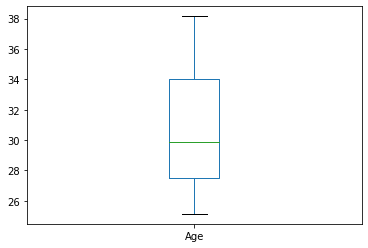

In [75]:
# box plot
tdf.groupby('cabin_class')['Age'].mean().plot(kind='box')

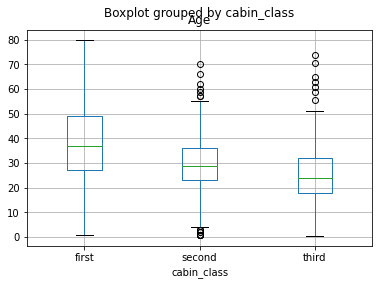

In [76]:
# break out a continuous variable by a categorical variable, use '.boxplot'
tdf.boxplot(column='Age', by='cabin_class')

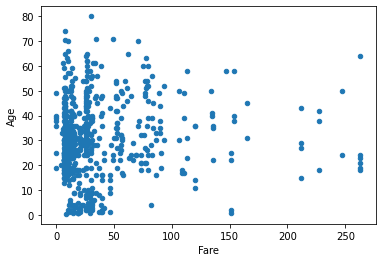

In [77]:
# 2 continuos variables: age by fare
tdf.plot(kind='scatter', x='Fare' , y='Age');

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

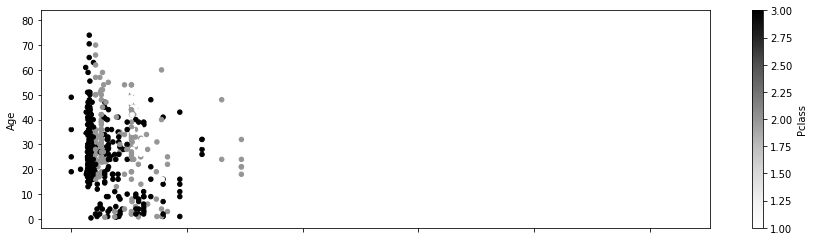

In [78]:
#c=color
tdf.plot(kind='scatter', x='Fare' , y='Age', c='Pclass', figsize=(15,4));

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

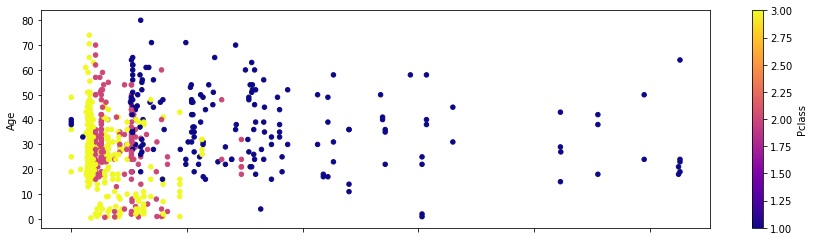

In [79]:
tdf.plot(kind='scatter', x='Fare' , y='Age', c='Pclass',colormap = 'plasma', figsize=(15,4));

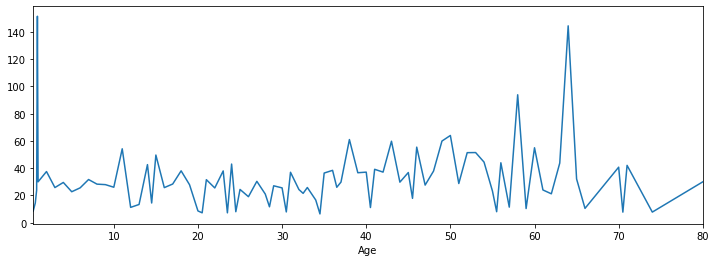

In [80]:
# line chart: age by fare
tdf.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

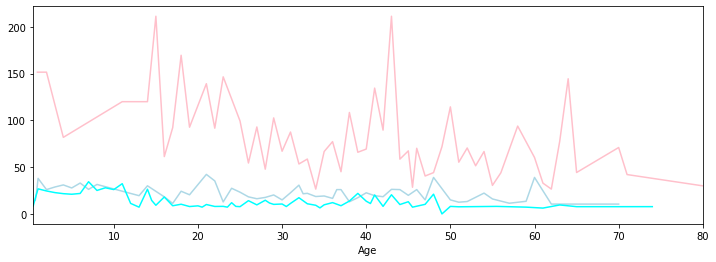

In [82]:
# group line chart
mycolors = ['pink', 'lightblue', 'cyan']
for x in [1,2,3]:
  tdf[tdf['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1]);


In [83]:
# Correlation Matrix
tdf.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


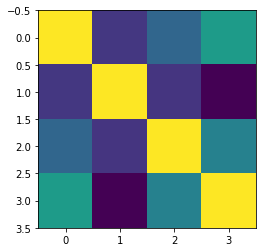

In [84]:
# display the correlation matrix as a heatmap
plt.imshow(tdf.corr());

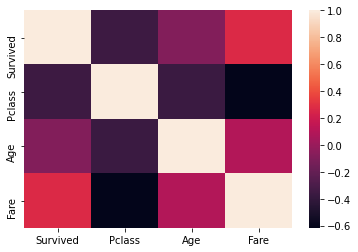

In [85]:
# seaborn
sns.heatmap(tdf.corr());

In [86]:
#MATPLOTLIB
#linear space
x = np.linspace(0, 5, 11)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [87]:
y = x**2
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

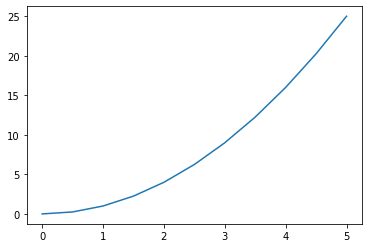

In [89]:
# very simple plot
#plt = library name
#.plot = method that goes to plt
plt.plot(x,y);

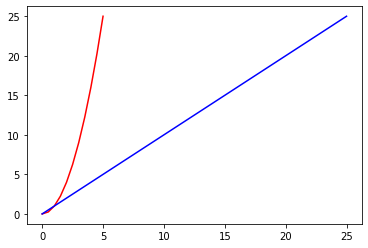

In [91]:
plt.plot(x,y, 'r')
plt.plot(x**2,y, 'b');


''

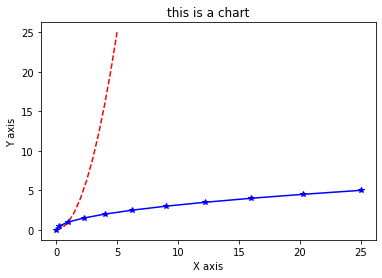

In [93]:
# -- texture to the line
plt.plot(x,y, 'r--')
plt.plot(y,x, 'b*-')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('this is a chart')
plt.savefig('myfigure.png')
;

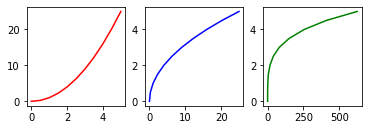

In [97]:
# basic syntax: plt.subplot(nrows, ncols, plot_number)
plt.subplot(2, 3, 1)
plt.plot(x,y, 'r')
plt.subplot(2, 3, 2)
plt.plot(y,x, 'b')
plt.subplot(2, 3, 3)
plt.plot(y**2,x, 'g')

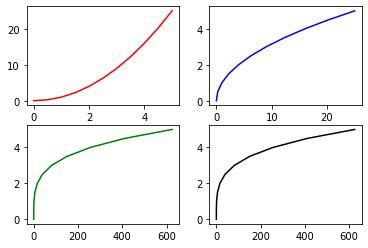

In [99]:
plt.subplot(2, 2, 1)
plt.plot(x,y, 'r')
plt.subplot(2, 2, 2)
plt.plot(y,x, 'b')
plt.subplot(2, 2, 3)
plt.plot(y**2,x, 'g')
plt.subplot(2, 2, 4)
plt.plot(y**2,x, 'k')

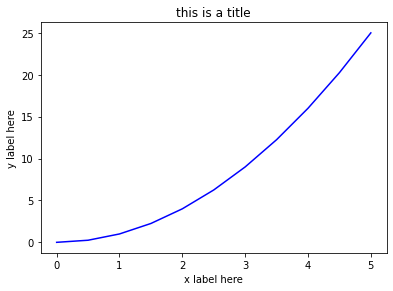

In [105]:
#Matplotlib Object Oriented Method
#fig= figure
#create figure
fig = plt.figure()
#add set of axes to figure
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# left, bottom, width, height (range 0 to 1)
#Plot on that set of axes
ax.plot(x,y, 'b')
#set_ to begin method
ax.set_xlabel('x label here')
ax.set_ylabel('y label here')
ax.set_title('this is a title')
plt.show()

''

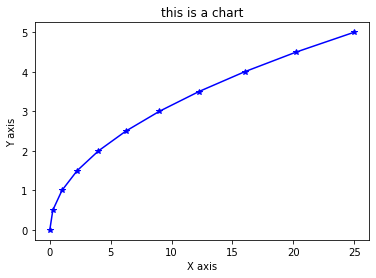

In [107]:
# subplots() method
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(y,x, 'b*-')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.title('this is a chart')
;

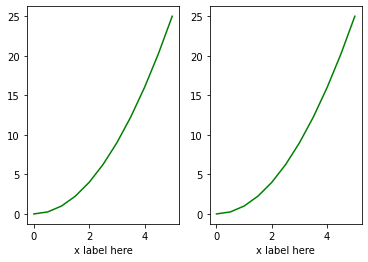

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in axes:
  ax.plot(x,y, 'g')
  ax.set_xlabel('x label here')

fig;

In [113]:
#figure size, aspect ratio and DPI
fig = plt.figure(figsize=(8, 4), dpi=100)

<Figure size 800x400 with 0 Axes>

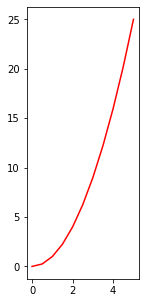

In [115]:
fig, axes = plt.subplots(figsize=(2, 5))
axes.plot(x,y, 'r')

In [0]:
# saving
fig.savefig('myfilr.jpg', dpi=200)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [124]:
# More Work Here
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=500)
display(example)

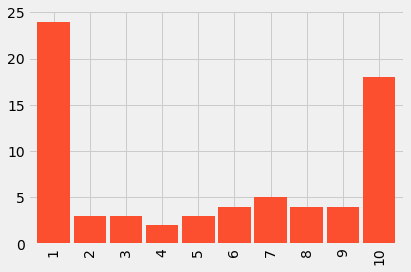

In [127]:
#fake data
plt.style.use('fivethirtyeight')
fakelist=[38, 3, 2, 1, 2, 4, 6, 5, 5, 33]
fakelist2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fakelist2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

In [128]:
#Panda series
fakeseries = pd.Series(fakelist, index=range(1,11))
fakeseries

1     38
2      3
3      2
4      1
5      2
6      4
7      6
8      5
9      5
10    33
dtype: int64

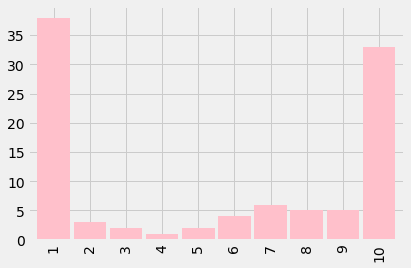

In [131]:
fakeseries.plot.bar(color='pink', width=0.9);

In [0]:
# longer fakelist
fakelist2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1,1,1,1,1,1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

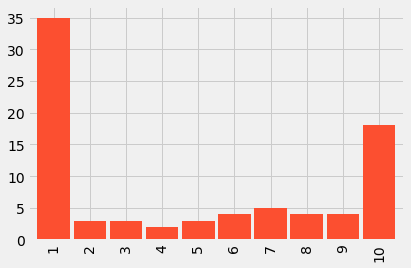

In [138]:
fakeseries2 = pd.Series(fakelist2)
fakeseries2.value_counts().sort_index().plot.bar(color='C1', width=0.9)

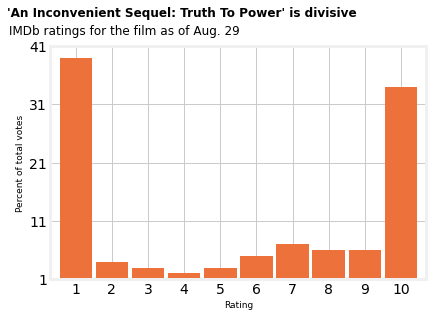

In [143]:
fig, axes = plt.subplots()
fig.patch.set(facecolor="white")
fakeseries.plot.bar(width=0.9, color="#ED713A")
axes.set(facecolor="white")
axes.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
axes.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);
axes.set_xlabel("Rating", fontsize=9)
axes.set_ylabel("Percent of total votes", fontsize=9)
axes.set_xticklabels(range(1,11), rotation=0)
axes.set_yticklabels(range(1,50,10))
axes.set_yticks(range(0,50,10));



In [144]:
display(example)

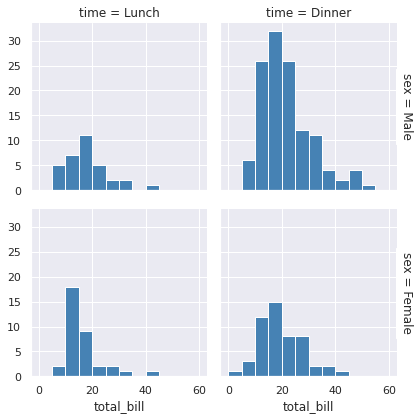

In [157]:
from IPython.display import display, HTML

url = 'http://seaborn.pydata.org/examples/faceted_histogram.html'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)